In [16]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Arrays for storing temperatures, function values, iterations, and states
temperatures = []
function_values = []
iterations = []
states = []

# Initial parameters
L_0 = 50  # Fixed Markov chain length


# Define the two-variable function
def f(x, y):
    return (x - 3)**2 + (y + 2)**2 + 5

def simulate(temp):
    current_x = random.uniform(-3, 4)
    current_y = random.uniform(-3, 4)
    best_solution = (current_x, current_y)
    best_value = f(current_x, current_y)


    L_i = L_0

    for i in range(1, 501):

        trails = 1
        while trails < L_i:
            new_x = random.uniform(-3, 4)
            new_y = random.uniform(-3, 4)
            delta_E = f(new_x, new_y) - f(current_x, current_y)

            if delta_E <= 0 or random.uniform(0, 1) < math.exp(-delta_E / temp):
                current_x = new_x
                current_y = new_y

            trails += 1

            best_solution = (current_x, current_y)
            best_value = f(current_x, current_y)


        states.append(best_solution)
        function_values.append(best_value)
        temperatures.append(temp)
        iterations.append(i)

        # Decrease the temperature
        delta_T = temp * 0.05
        temp -= delta_T

    return best_solution, best_value, states, function_values, temperatures, iterations

In [17]:
best_solution, best_value, states, function_values,temperatures,iterations= simulate(1500)

In [18]:
temperatures1 = [] # Array for the temperatures
function_values1 = []
iterations1 = []
states1 = []

# delta_T = 1  # Decrement value


# Define the two-variable function
def f(x, y):
    return (x-3)**2 + (y+2)**2 + 5

def simulate(temp):
    current_x = random.uniform(-3, 4)
    current_y = random.uniform(-3, 4)
    best_solution = (current_x, current_y)
    best_value = f(current_x, current_y)
    new_x = random.uniform(-3, 4)
    new_y = random.uniform(-3, 4)

    for i in range(1, 501):
        delta_E = f(new_x, new_y) - f(current_x, current_y)

        if delta_E <= 0:
            current_x = new_x
            current_y = new_y
            if f(current_x, current_y) < best_value:
                best_solution = (current_x, current_y)
                best_value = f(current_x, current_y)
            new_x = random.uniform(-3, 4)
            new_y = random.uniform(-3, 4)
        elif math.exp(-delta_E / temp) > random.uniform(0, 1):
            current_x = new_x
            current_y = new_y
            if f(current_x, current_y) < best_value:
                best_solution = (current_x, current_y)
                best_value = f(current_x, current_y)
            new_x = random.uniform(-3, 4)
            new_y = random.uniform(-3, 4)
        else:
            new_x = random.uniform(-3, 4)
            new_y = random.uniform(-3, 4)


        states1.append((current_x, current_y))
        function_values1.append(f(current_x, current_y))
        temperatures1.append(temp)
        iterations1.append(i)
        #i = i+1
        L = 5
        delta_T = temp*0.05 # Decrement Value
        if i % L == 0:
            temp = temp - delta_T

    return best_solution, best_value,states1,temperatures1,function_values1,iterations1

In [19]:
best_solution1, best_value1, states1,temperature1, function_values1,iterations1 = simulate(1500)

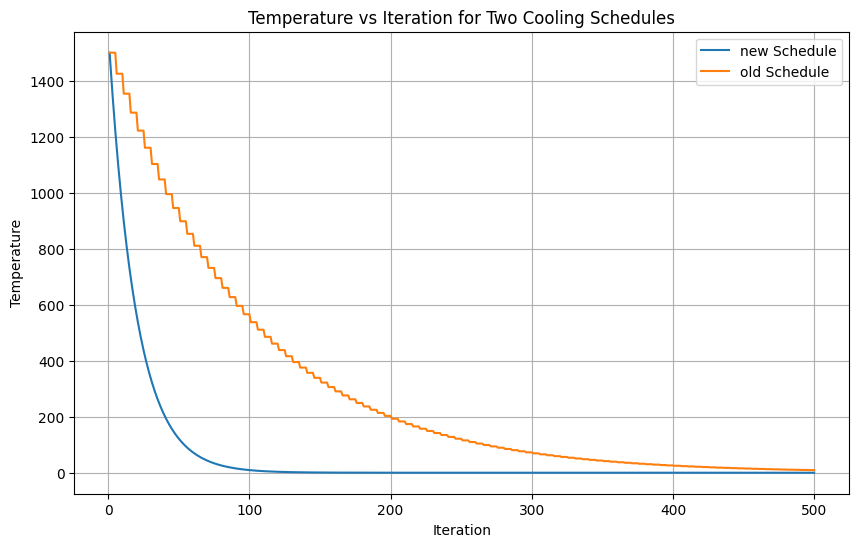

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(iterations,temperatures,label = 'new Schedule')
plt.plot(iterations1,temperature1, label='old Schedule')
plt.xlabel('Iteration')
plt.ylabel('Temperature')
plt.title('Temperature vs Iteration for Two Cooling Schedules')
plt.legend()
plt.grid(True)
plt.show()

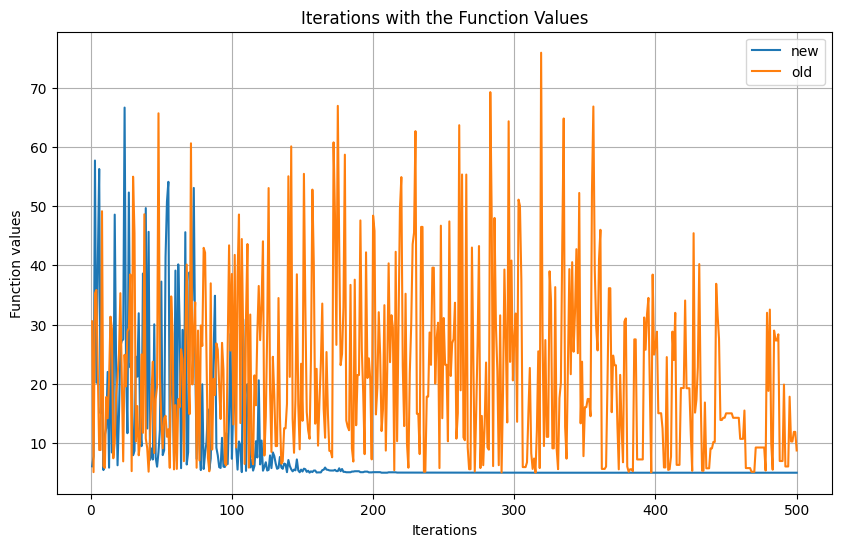

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(iterations,function_values,label = "new")
plt.plot(iterations1,function_values1,label = "old")
plt.xlabel('Iterations')
plt.ylabel('Function values')
plt.title('Iterations with the Function Values')
plt.legend()
plt.grid(True)
plt.show()